In [6]:
import torch
from diffusers import AutoPipelineForText2Image
import matplotlib.pyplot as plt
from PIL import Image
from huggingface_hub import login

In [ ]:
# Autenticación con Hugging Face Hub
login(token="XXXXXXXXXXXXXXXXX")

In [8]:
# Lista de modelos a usar
MODELS = [
    "runwayml/stable-diffusion-v1-5",
    "prompthero/openjourney",
    "stabilityai/stable-diffusion-2-1"
]

# Parámetros de inferencia
NUM_INFERENCE_STEPS = 25
GUIDANCE_SCALE = 7.5

In [9]:
def generate_images(prompt):
    IMAGES = []

    for model_id in MODELS:
        print(f"\n--- Loading model: {model_id} ---")
        pipe = AutoPipelineForText2Image.from_pretrained(
            model_id,
            torch_dtype=torch.float16,
            use_safetensors=True
        ).to("cuda")

        image = pipe(
            prompt,
            num_inference_steps=NUM_INFERENCE_STEPS,
            guidance_scale=GUIDANCE_SCALE
        ).images[0]

        IMAGES.append((model_id, image))
        pipe.to("cpu"); del pipe; torch.cuda.empty_cache()

    return IMAGES

In [10]:
def display_and_save_images(images):
    fig, axs = plt.subplots(1, len(images), figsize=(18, 6))
    for ax, (model_id, img) in zip(axs, images):
        ax.imshow(img)
        ax.set_title(model_id.split("/")[-1], fontsize=10)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

    # Guardar imágenes
    for model_id, img in images:
        model_name = model_id.split("/")[-1]
        img.save(f"generated_{model_name}.png")



--- Loading model: runwayml/stable-diffusion-v1-5 ---


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, du


--- Loading model: prompthero/openjourney ---


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, du


--- Loading model: stabilityai/stable-diffusion-2-1 ---


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, du

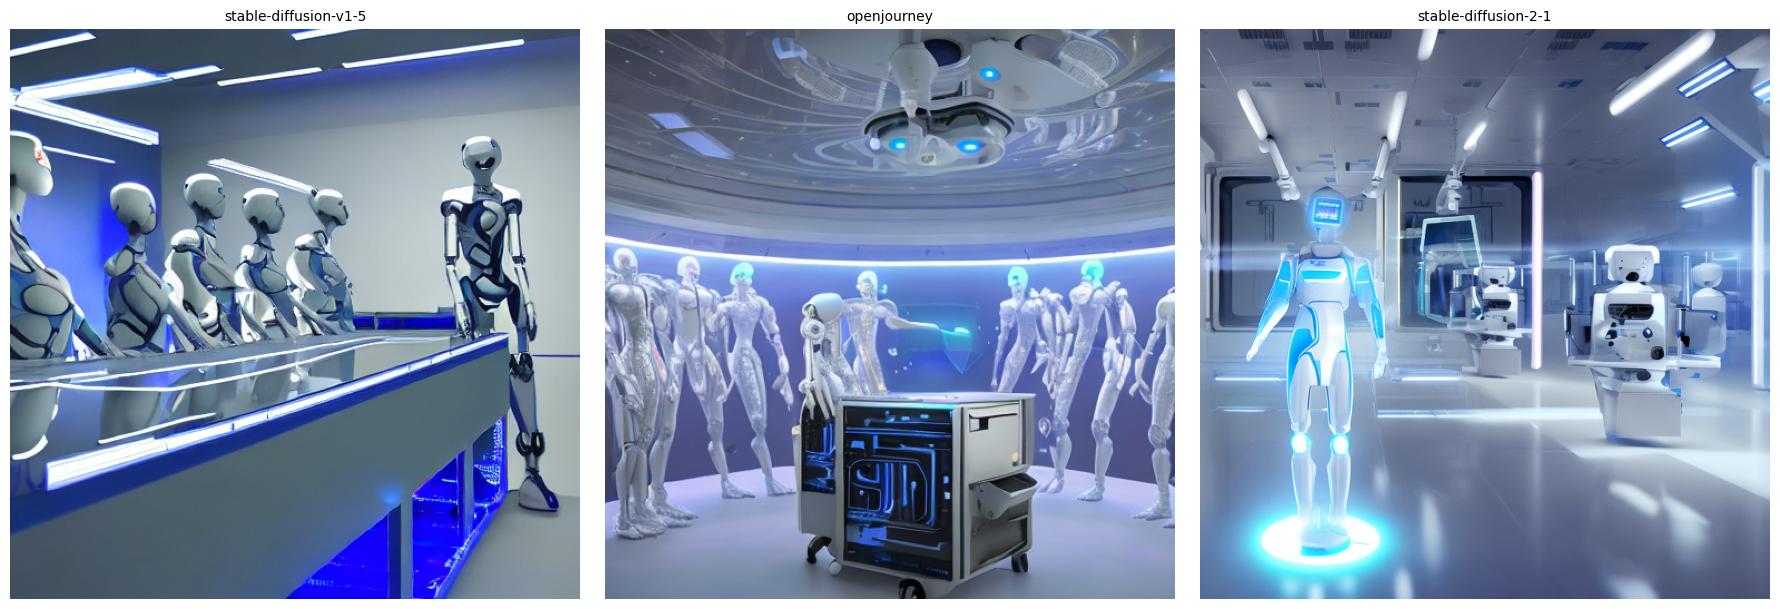

In [19]:
# Ingresar el prompt
prompt = "A high-tech laboratory with a humanoid AI robot connected to holographic interfaces, blue and white lighting, clean sci-fi environment, hyperrealistic"  # Puedes cambiar este texto

# Generar y mostrar imágenes
images = generate_images(prompt)
display_and_save_images(images)